### Урок3. Связь бизнес-показателей и DS-метрик

План занятия:
0. Ликбез: train/test/val и crossvalidation
1. переход от вероятностей к меткам в задаче бинарной классификации
2. какие бывают DS-метрики, их интерпретация
3. пример из практики
4. бизнес-метрики
5. взаимосвязь DS и бизнес метрик
6. case1 - фильтрация токсичных комментариев
7. case2 - определение ССЗ 

### Разбивка на train/test/val

![ab_split](Sets.png "Tr_Test_val")

#### Вопрос 1: в чем назначение каждого из набора данных?

### Кроссвалидация (CV)

![ab_split](cv.png "CV")

### Задача бинарной классификации

![ab_split](binary_clf1.jpg "binary1")

Бинарный классификатор выдает нам "вероятности" (всегда ли?). Вроде 0.13, 0.87, etc

Однако нам от этого всего мало пользы и требуется в рамках практической задачи получить метки классов.

Например, в задаче оттока нам нужно отобрать подмножество пользователей, которые собираются уйти от нас для дальнейшей работы. 


Очевидное решение:
1. проскорить пользователей нашей моделью
2. отсортировать по убыванию "вероятности" (предсказаний нашей модели) - мы предполагаем, что чем больше "вероятность" ухода, тем более склонен конкретный пользователь уйти в отток
3. взять какой-то топ N пользователей получившегося списка

<b>Вопрос: какой N должен быть?</b>

<b>И еще вопрос: почему мы не можем взять тупо весь список?</b>

Выгода для клиента часто может быть невыгодна для сервиса/компании/оператора связи/etc (вернемся к этому немного позже)

### Задача бинарной классификации

Проиллюстрируем на примере

![ab_split](binary_clf2.jpg "binary2")

На практике чаще все не так идеально:

![ab_split](binary_clf3.png "binary3")

Пусть классификатор выдаёт метку класса. 

Обозначения: 
* yi – метка i-го объекта, 
* ai – ответ на конкретном объекте нашего алгоритма (предсказание), 
* m – число объектов в выборке

Самым простым и распространённым функционалом качества является точность (Accuracy или Mean Consequential Error):

![ab_split](accuracy.png "accuracy")

<b>Вопрос: в чем проблема такой метрики?</b>

<b>В каком случае она может быть использована?</b>

Т.е это просто доля (процент) объектов, на которых алгоритм выдал правильные ответы. Недостаток такого функционала понятен: он плохо справляется в случае дисбаланса классов, когда представителей одного из классов существенно больше, чем второго. В этом случае, с точки зрения точности, выгодно почти всегда выдавать метку самого популярного класса. Это может не согласовываться с логикой использования решения задачи. Например, в задаче детектирования редкого заболевания алгоритм, который всех относит к классу «здоровые», бесполезен.

Такая метрика нам не подходит (если выборка сбалансирована, то может и подойти), давайте двигаться далее

Рассмотрим такую штуку, как confusion_matrix

![ab_split](confusion_matrix.png "confusion_matrix")

Пример

![ab_split](conf_matrix.png "confusion_matrix")

Два класса делятся на положительный (обычно метка 1) и отрицательный (обычно метка 0 или –1). 

Объекты, которые алгоритм относит к положительному классу, называются положительными (Positive), те из них, которые на самом деле принадлежат к этому классу – истинно положительными (True Positive), остальные – ложно положительными (False Positive). Аналогичная терминология есть для отрицательного (Negative) класса. 

Дальше используем естественные сокращения:

* TP = True Positive,
* TN = True Negative,
* FP = False Positive,
* FN = False Negative.

![ab_split](accuracy2.png "accuracy2")

<b>Пример</b>

Допустим, мы хотим оценить работу системы, которая определяет токсичность комментариев. У нас есть 1000 обычных комментариев, 900 из которых наш бинарный классификатор определил верно как нормальные (True Negative = 900, False Positive = 100), и 50 токсичных комментариев, 25 из которых классификатор также определил верно (True Positive = 25, False Negative = 25).

Тогда accuracy получается таким:

In [41]:
accuracy = (25+900)/(900+100+25+25)
print(accuracy)

0.8809523809523809


А что если у нас тупой классификатор, который отвечает всегда, что комментарий не является токсичным?

In [42]:
accuracy = (1000)/(900+100+25+25)
print(accuracy)

0.9523809523809523


Видим, что accuracy выше, но нам явно такой классификатор не нужен

### Ошибки первого и второго рода

Ошибки классификатора делятся на две группы: первого и второго рода. 

В идеале (когда точность равна 100%) матрица несоответствий диагональная, ошибки вызывают отличие от нуля двух недиагональных элементов:

ошибка 1 рода (Type I Error) случается, когда объект ошибочно относится к положительному классу (= FP/m).


ошибка 2 рода (Type II Error) случается, когда объект ошибочно относится к отрицательному классу (= FN/m).

<b>Вопрос: являются ли эти ошибки равнозначными? В каких случаях да, а в каких нет? Приведите примеры</b>

### Другие метрики качества бинарной классификации

Раз уж мы разобрались с тем, что ошибки на разных классах имеют разный вес в рамках конкретной прикладной задачи, давайте введем метрики качества отдельно для классов

![ab_split](pr_rec.png "PRRecall")

Precision можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными, а recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.

![ab_split](pr_rec2.png "PRRecall2")

Вернемся к примеру с токсичными сообщениями

Допустим, мы хотим оценить работу системы, которая определяет токсичность комментариев. У нас есть 1000 обычных комментариев, 900 из которых наш бинарный классификатор определил верно как нормальные (True Negative = 900, False Positive = 100), и 50 токсичных комментариев, 25 из которых классификатор также определил верно (True Positive = 25, False Negative = 25).

In [1]:
precision = 25/(25+100)
recall = 25/(25+25)
print("Precision: {}".format(precision))
print("Recall: {}".format(recall))

Precision: 0.2
Recall: 0.5


<b>Вопрос: что мы можем сделать с прогнозами классификатора, чтобы поменять эти значения?</b>

<b>Бонусный вопрос: что будет с precision, если порог классификации выбрать равным 0? А с recall?</b>

<b>Пример</b>

In [2]:
import pandas as pd

df = pd.DataFrame({'y_true': [0,1,1,0,1,0,0,0,0,1], 
              'y_score': [0.1, 0.98, 0.52, 0.2, 0.41, 0.21, 0.95, 0.14, 0.01, 0.16]})
df

,y_true,y_score
0,0,0.10
1,1,0.98
2,1,0.52
3,0,0.20
4,1,0.41
5,0,0.21
6,0,0.95
7,0,0.14
8,0,0.01
9,1,0.16


Отсортируем по y_score

In [3]:
df = df.sort_values(by='y_score', ascending=False)
df

,y_true,y_score
1,1,0.98
6,0,0.95
2,1,0.52
4,1,0.41
5,0,0.21
3,0,0.20
9,1,0.16
7,0,0.14
0,0,0.10
8,0,0.01


У нас всего 10 объектов, из которых 4 относятся к классу "1" и 6 - к классу "0"

Для того, чтобы перейти от "вероятностей" (y_score) к меткам, выберем порог. Начнем с 0.5

In [4]:
th = 0.5
df['y_score_class'] = df['y_score'].apply(lambda x: 1 if x>=th else 0, 1)
df

,y_true,y_score,y_score_class
1,1,0.98,1
6,0,0.95,1
2,1,0.52,1
4,1,0.41,0
5,0,0.21,0
3,0,0.20,0
9,1,0.16,0
7,0,0.14,0
0,0,0.10,0
8,0,0.01,0


In [5]:
tp = 2
fp = 1
tn = 5
fn = 2

precison = tp/(tp+fp)
recall = tp/(tp+fn)
print("Precision: {}".format(precision))
print("Recall: {}".format(recall))

Precision: 0.2
Recall: 0.5


Попробуем другой порог - 0.4

In [6]:
th = 0.4
df['y_score_class'] = df['y_score'].apply(lambda x: 1 if x>=th else 0, 1)
df

,y_true,y_score,y_score_class
1,1,0.98,1
6,0,0.95,1
2,1,0.52,1
4,1,0.41,1
5,0,0.21,0
3,0,0.20,0
9,1,0.16,0
7,0,0.14,0
0,0,0.10,0
8,0,0.01,0


In [7]:
tp = 3
fp = 1
tn = 5
fn = 1

precision = tp/(tp+fp)
recall = tp/(tp+fn)
print("Precision: {}".format(precision))
print("Recall: {}".format(recall))

Precision: 0.75
Recall: 0.75


А что если понизить порог до 0.15

In [8]:
th = 0.15
df['y_score_class'] = df['y_score'].apply(lambda x: 1 if x>=th else 0, 1)
df

,y_true,y_score,y_score_class
1,1,0.98,1
6,0,0.95,1
2,1,0.52,1
4,1,0.41,1
5,0,0.21,1
3,0,0.20,1
9,1,0.16,1
7,0,0.14,0
0,0,0.10,0
8,0,0.01,0


In [9]:
tp = 4
fp = 3
tn = 3
fn = 0

precision = tp/(tp+fp)
recall = tp/(tp+fn)
print("Precision: {}".format(precision))
print("Recall: {}".format(recall))

Precision: 0.5714285714285714
Recall: 1.0


### Переходим к f-score

Существует несколько различных способов объединить precision и recall в агрегированный критерий качества. 

F-score — среднее гармоническое precision и recall (обычно):

![ab_split](f_score1.png "F-score")

F-score достигает максимума при полноте и точности, равными единице, и близка к нулю, если один из аргументов близок к нулю.

In [3]:
import numpy as np
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

precision, recall, thresholds = precision_recall_curve(df['y_true'], df['y_score'])
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

Best Threshold=0.410000, F-Score=0.750, Precision=0.750, Recall=0.750


В sklearn много всего удобного уже есть, чем можно пользоваться, не изобретая велосипед

### Метрики качества, для которых не нужно подбирать порог

### ROC AUC

![ab_split](tpr_fpr.png "roc auc1")

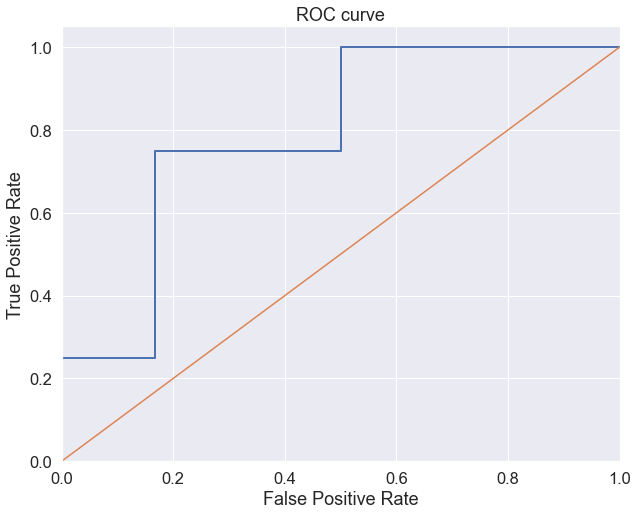

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(df['y_true'], df['y_score'], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

In [12]:
df

,y_true,y_score,y_score_class
1,1,0.98,1
6,0,0.95,1
2,1,0.52,1
4,1,0.41,1
5,0,0.21,1
3,0,0.20,1
9,1,0.16,1
7,0,0.14,0
0,0,0.10,0
8,0,0.01,0


In [60]:
roc_auc_score(df['y_true'], df['y_score'])

0.7916666666666667

<b>Вопрос: какой roc auc у случайного классификатора?</b>

In [27]:
roc_auc_score(df.sample(frac=1)['y_true'], df.sample(frac=1)['y_score'])

0.7083333333333334

<b>Вопрос: что делать, если roc auc меньше 0.5?</b>

Выглядит она не очень, но это только из-за того, что у нас мало данных

Как вообще строится этот график?

In [58]:
df[['y_true', 'y_score']]

,y_true,y_score
1,1,0.98
6,0,0.95
2,1,0.52
4,1,0.41
5,0,0.21
3,0,0.20
9,1,0.16
7,0,0.14
0,0,0.10
8,0,0.01


Чем хороша данная метрика?

1. часто используют для оценивания качества упорядочивания алгоритмом объектов двух классов
2. показывает долю правильно упорядоченных пар
3. может быть интерпретирован как вероятность того, что случайно выбранный positive объект будет проранжирован классификатором выше (будет иметь более высокую вероятность быть positive), чем случайно выбранный negative объект

### ПЕРЕРЫВ до 21:10

### Кейс 1 - фильтрация токсичных комментариев

Есть сервис, где люди могут оставлять комментарии

При этом часть комментариев является токсичной, т.е содержит расистские, сексистские и тому подобные вещи.

Над проверкой сообщений работают модераторы и мы хотим уменьшить на них нагрузку с помощью ML.

Вспомним первое занятие и сформулируем гипотезу

#### Гипотеза 1.
Мы предполагаем, что автоматическая фильтрация токсичных комментариев снизит нагрузку на модераторов и повысит их пропускную способность на 10%, при этом доля FP не превысит 10%

![ab_split](diag1.jpg "diag1")

In [8]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from scipy.sparse import hstack
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

class_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

train = pd.read_csv('train.csv').fillna(' ').sample(frac=1)
train.head(3)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
3657,09c7776f1f7f74b9,u aint got no pancake mix lady so stopppp,1,0,0,0,0,0
120626,853e2fcc75f26930,"Yep, only 12 so far. This (albeit 2005) says...",0,0,0,0,0,0
63760,aa9a2f018323bb8b,"i doubt he ever SERIOUSLY considered college, ...",0,0,0,0,0,0


Здесь много разных вариантов, но мы сведем все к бинарному классу - toxic/nontoxic

In [9]:
train['y'] = train[class_names].max(axis=1).values
train['y'].value_counts()

0    143346
1     16225
Name: y, dtype: int64

Сделаем тренировочную и тестовую выборки

In [10]:
#разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(train.drop('y', 1), 
                                                    train['y'], random_state=0)

C:\Users\Daria\AppData\Local\Temp\ipykernel_19760\3147698093.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train, X_test, y_train, y_test = train_test_split(train.drop('y', 1),


Посмотрим на распределение классов в выборках

In [11]:
y_train.value_counts(normalize=True)

0    0.897784
1    0.102216
Name: y, dtype: float64

In [13]:
y_test.value_counts(normalize=True)

0    0.899932
1    0.100068
Name: y, dtype: float64

Построим простое векторное представление текстов и обучим логистическую регрессию

In [14]:
#соберем наш простой pipeline, но нам понадобится написать класс для выбора нужного поля
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.column]

classifier = Pipeline([('comment_text_selector', FeatureSelector(column='comment_text')), 
                     ('comment_text_tfidf', TfidfVectorizer(sublinear_tf=True,
                                                            strip_accents='unicode',
                                                            analyzer='word',
                                                            token_pattern=r'\w{1,}',
                                                            stop_words='english',
                                                            ngram_range=(1, 1),
                                                            max_features=10000)), 
                     ('clf', LogisticRegression(C=0.1, solver='sag'))])

#запустим кросс-валидацию
cv_scores = cross_val_score(classifier, X_train, y_train, cv=3, scoring='roc_auc')
cv_score = np.mean(cv_scores)
print('CV score is {}'.format(cv_score))

#обучим пайплайн на всем тренировочном датасете
classifier.fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)[:, 1]

CV score is 0.9558891921811568


Воспользуемся доступным в sklearn инструментарием, чтобы получить оптимальный порог

In [15]:
import numpy as np
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, confusion_matrix

b=2.55

precision, recall, thresholds = precision_recall_curve(y_test.values, y_score)
fscore = (1+b**2)*(precision * recall) / (b**2*precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

Best Threshold=0.112510, F-Score=0.799, Precision=0.502, Recall=0.879


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159571 entries, 3657 to 65252
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
 8   y              159571 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 12.2+ MB


Нарисуем roc кривую

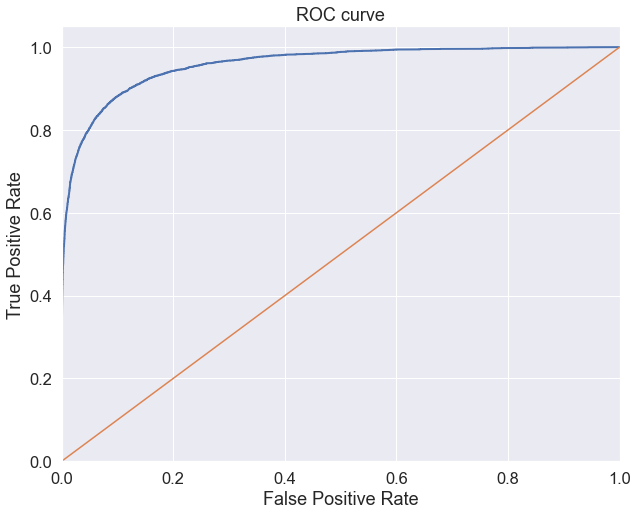

In [17]:
import seaborn as sns
import itertools
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds_ = roc_curve(y_test, y_score, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

Как это интерпетировать? Давайте построим матрицу ошибок, чтобы стало понятнее

In [573]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=4)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    # print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[32415  3486]
 [  483  3509]]


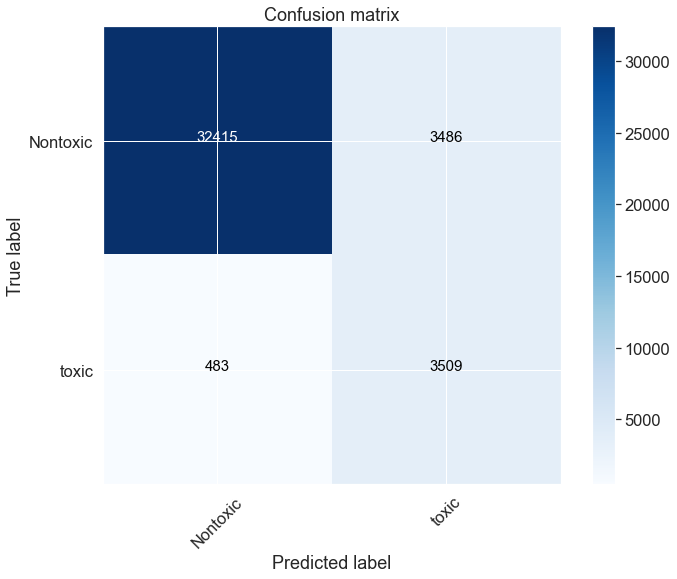

In [19]:
#мы уже нашли ранее "оптимальный" порог, когда максимизировали f_score
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, y_score>thresholds[ix])
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Nontoxic', 'toxic'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

Посчитаем FPR, TPR

In [20]:
TN = cnf_matrix[0][0]
FN = cnf_matrix[1][0]
TP = cnf_matrix[1][1]
FP = cnf_matrix[0][1]

Посчитаем нужные нам метрики

In [21]:
TPR = TP/(TP+FN)
FPR = FP/(FP+TN)
TNR = TN/(FP+TN)
TPR, FPR, TNR

(0.8790080160320641, 0.09710035932146736, 0.9028996406785327)

False Positive Rate всего лишь 0.096.

Это означает, что только 9.6 процентов всех комментариев будут помечены как токсичные некорректно

Вывод:

Мы можем автоматически фильтровать 88 процентов токсичных комментариев! Однако есть еще TPR

Глобальные выводы:

1. TNR = 0.9 -> модель может автоматически фильтровать 90% токсичных комментариев
2. TPR = 0.88 -> доля ошибочно классифицированных как токсичных (хотя это нормальные комментарии), не будет превышать при этом 9.6 процентов

Что дальше? - планируем эксперимент!

### Кейс 2 - определение ССЗ

ссылка на соревнование - https://mlbootcamp.ru/ru/round/12/sandbox/

В рамках конкурса вам нужно предсказать наличие сердечно-сосудистых заболеваний по результатам классического врачебного осмотра. Датасет сформирован из 100.000 реальных клинических анализов, и в нём используются признаки, которые можно разбить на 3 группы:

 

Объективные признаки:

 - Возраст
 - Рост
 - Вес
 - Пол
 

Результаты измерения:

 - Артериальное давление верхнее и нижнее
 - Холестерин
 - Глюкоза
 

Субъективные признаки:

 - Курение
 - Употребление Алкоголя
 - Физическая активность
 

Возраст дан в днях. Значения показателей холестерина и глюкозы представлены одним из трех классов: норма, выше нормы, значительно выше нормы. Значения субъективных признаков — бинарны.

Все показатели даны на момент осмотра.

Таргет - наличие сердечно-сосудистых заболеваний (ССЗ)

In [25]:
df = pd.read_csv('train_case2.csv', sep=';')
df.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1


Разделим наши данные на тренировочную и тестовую выборки

In [26]:
#разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(df.drop('cardio', axis=1), 
                                                    df['cardio'], random_state=0)

К полям:
- gender, cholesterol применим OHE-кодирование
- age, height, weight, ap_hi, ap_lo - standardScaler
- gluc, smoke, alco, active - оставим пока как есть

In [27]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in test_columns:
            if col_ not in self.columns:
                X[col_] = 0
        return X[self.columns]


from sklearn.preprocessing import StandardScaler


continuos_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
cat_cols = ['gender', 'cholesterol']
base_cols = ['gluc', 'smoke', 'alco', 'active']

continuos_transformers = []
cat_transformers = []
base_transformers = []

for cont_col in continuos_cols:
    transfomer =  Pipeline([
                ('selector', NumberSelector(key=cont_col)),
                ('standard', StandardScaler())
            ])
    continuos_transformers.append((cont_col, transfomer))
    
for cat_col in cat_cols:
    cat_transformer = Pipeline([
                ('selector', ColumnSelector(key=cat_col)),
                ('ohe', OHEEncoder(key=cat_col))
            ])
    cat_transformers.append((cat_col, cat_transformer))
    
for base_col in base_cols:
    base_transformer = Pipeline([
                ('selector', NumberSelector(key=base_col))
            ])
    base_transformers.append((base_col, base_transformer))

Теперь объединим все наши трансформеры с помощью FeatureUnion

In [187]:
from sklearn.pipeline import FeatureUnion

feats = FeatureUnion(continuos_transformers+cat_transformers+base_transformers)
feature_processing = Pipeline([('feats', feats)])

feature_processing.fit_transform(X_train)

array([[ 1.55932102,  0.92818417,  0.68055465, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.94925901,  0.20260164, -0.77749084, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.04936688, -0.28112004, -0.63862937, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-2.06740642,  0.20260164, -1.47179822, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.98736255, -0.76484172,  1.99973868, ...,  0.        ,
         0.        ,  1.        ],
       [-0.70540752,  1.89562754,  1.93030794, ...,  1.        ,
         0.        ,  1.        ]])

Добавим классификатор и запустим кросс-валидацию

In [188]:
classifier = Pipeline([
    ('features',feats),
    ('classifier', LogisticRegression(random_state = 42)),
])


#запустим кросс-валидацию
cv_scores = cross_val_score(classifier, X_train, y_train, cv=16, scoring='roc_auc')
cv_score = np.mean(cv_scores)
cv_score_std = np.std(cv_scores)
print('CV score is {}+-{}'.format(cv_score, cv_score_std))

#обучим пайплайн на всем тренировочном датасете
classifier.fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)[:, 1]

CV score is 0.7820146665174169+-0.01101100782257652


Посчитаем precision/recall/f_score

In [30]:
b=1
precision, recall, thresholds = precision_recall_curve(y_test.values, y_score)
fscore = (1+b**2)*(precision * recall) / (b**2*precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

Best Threshold=0.386937, F-Score=0.730, Precision=0.647, Recall=0.838


Нарисуем roc auc кривую (кстати, наверное неплохо бы ее вынести в отдельную функцию)

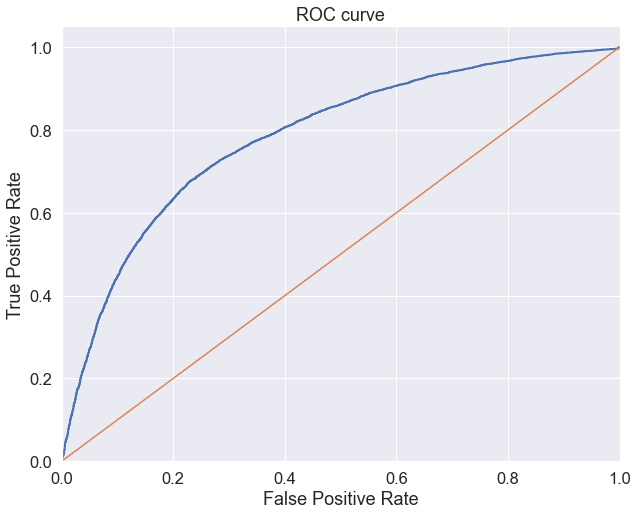

In [31]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds_ = roc_curve(y_test, y_score, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

In [33]:
from sklearn.metrics import roc_auc_score, log_loss

#Ваш код здесь
print("roc auc score: {}".format(roc_auc_score(y_true=y_test, y_score=classifier.predict_proba(X_test)[:,1])))
print("log loss score: {}".format(log_loss(y_true=y_test, y_pred=classifier.predict_proba(X_test)[:,1])))

roc auc score: 0.7840347790421852
log loss score: 0.577960400823067


Посомтрим на матрицу ошибок

Confusion matrix, without normalization
[[4861 3959]
 [1411 7269]]


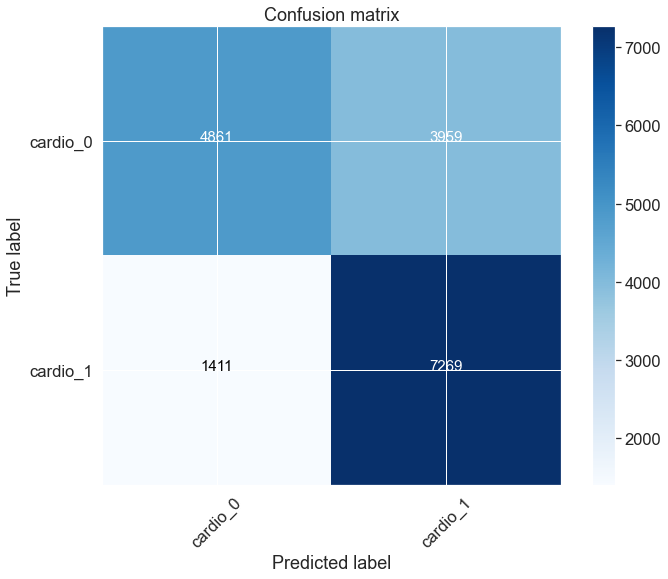

In [34]:
#мы уже нашли ранее "оптимальный" порог, когда максимизировали f_score
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, y_score>thresholds[ix])
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['cardio_0', 'cardio_1'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

Посчитаем FPR, TPR

In [35]:
TN = cnf_matrix[0][0]
FN = cnf_matrix[1][0]
TP = cnf_matrix[1][1]
FP = cnf_matrix[0][1]

TPR = TP/(TP+FN)
FPR = FP/(FP+TN)
TNR = TN/(FP+TN)
TPR, FPR, TNR

(0.837442396313364, 0.44886621315192743, 0.5511337868480726)

False Positive Rate довольно высокий ~ 0.45.

Это означает, что 45 процентов всех пациентов получат метку 1 при том, что они на самом деле здоровы

6996

Хорошая ли модель у нас получилась? - ответ сильно зависит от внешних факторов (какое количество FP мы можем допустить)

### Домашнее задание

1. обучить несколько разных моделей на наборе данных ССЗ (train_case2.csv): логрег, бустинг, лес и т.д - на ваш выбор 2-3 варианта
2. при обучении моделей обязательно использовать кроссвалидацию
3. вывести сравнение полученных моделей по основным метрикам классификации: pr/rec/auc/f_score (можно в виде таблицы, где строки - модели, а столбцы - метрики)
4. сделать выводы о том, какая модель справилась с задачей лучше других
5. (опциональный вопрос) какая метрика (precision_recall_curve или roc_auc_curve) больше подходит в случае сильного дисбаланса классов? (когда объектов одного из классов намного больше чем другого). 

p.s.В вопросе проще разобраться, если вспомнить оси на графике roc auc curve и рассмотреть такой пример:

Имеется 100000 объектов, из которых только 100 - класс "1" (99900 - класс "0", соответственно). 
Допустим, у нас две модели:

- первая помечает 100 объектов как класс 1, но TP = 90
- вторая помечает 1000 объектов как класс 1, но TP такой же - 90

Какая модель лучше и почему? И что позволяет легче сделать вывод - roc_auc_curve или precision_recall_curve?

### Ссылки

1. https://dyakonov.org/2017/07/28/auc-roc-площадь-под-кривой-ошибок/
2. https://en.wikipedia.org/wiki/Receiver_operating_characteristic

### Express EDA and FE

In [562]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import ExtraTreesClassifier, IsolationForest # ISO to search and mark outliers
import lightgbm
from lightgbm import LGBMClassifier

import category_encoders as ce

from sklearn.experimental import enable_iterative_imputer # maybe useful if replacing outliers
from sklearn.impute import IterativeImputer
from sklearn.base import clone
from sklearn.compose import make_column_transformer
from sklearn.metrics import classification_report, f1_score, accuracy_score, roc_auc_score, f1_score, precision_score
from sklearn.feature_selection import SelectFromModel
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, confusion_matrix, log_loss, recall_score
from sklearn.metrics import PrecisionRecallDisplay, ConfusionMatrixDisplay, RocCurveDisplay

from itertools import combinations

from imblearn.pipeline import make_pipeline
from imblearn import FunctionSampler

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import optuna
from optuna.samplers import TPESampler

import shap

In [685]:
def cross_validation(clf, X, y, scoring='f1', cv=5):
    scores = cross_val_score(estimator=clf, X=X, y=y, cv=cv, scoring=scoring, n_jobs=-1)
    print(f'Меры правильности перекрекстной оценки: {scores}')
    print(f'Точность перекретсной оценки: {np.mean(scores):.3f} +/- {np.std(scores):.3f}')
    return scores

def report(y_train, y_train_pred, y_test, y_test_pred, y_train_proba=None, y_test_proba=None):
    print('Train\n', classification_report(y_train, y_train_pred, digits=3))
    print('Test\n', classification_report(y_test, y_test_pred, digits=3))
    if y_train_proba is not None and y_test_proba is not None:
        roc_train, roc_test = roc_auc_score(y_train, y_train_proba), roc_auc_score(y_test, y_test_proba)
        print(f'Train ROC_AUC: {roc_train:.4f}, Test ROC_AUC: {roc_test:.4f}')
    print(f'Train logloss: {log_loss(y_train, y_train_pred):.3f}, Test logloss: {log_loss(y_test, y_test_pred):.3f}')
    print('Confusion Matrix', '\n', pd.crosstab(y_test, y_test_pred))
    
def reduce_memory(df):
    start_mem = df.memory_usage().sum() / 1024 ** 2
    for col in df.columns:
        col_type = df[col].dtype
        if col_type != object and str(col_type)[:4] != 'uint' and str(col_type) != 'category':
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        elif str(col_type)[:4] != 'uint':
            df[col] = df[col].astype('category')
    end_mem = df.memory_usage().sum() / 1024 ** 2
    return df

def business_threshold_calibrate(y_test, y_score, n=20,
                                 rubl_test=100, rubl_early_treatment=100, rubl_late_treatment=1000, plot=True):
    business_threshold = 0
    r_test_all_r_ML_ = 0

    rubl_ML_ = np.inf 

    rs = []
    rubl_1 = np.sum(y_test) * rubl_late_treatment
    rubl_test_all = len(y_test) * rubl_test + np.sum(y_test) * rubl_early_treatment
    
    for opt_buisness_tr in np.linspace(0, 1, n).tolist():
        # подберем порог для улучшения бизнесс показателя

        cnf_matrix = confusion_matrix(y_test, y_score > (opt_buisness_tr))
        TN = cnf_matrix[0][0]
        FN = cnf_matrix[1][0]
        TP = cnf_matrix[1][1]
        FP = cnf_matrix[0][1]

        # rubl_1 = (TP + FN) * rubl_late_treatment
        # rubl_test_all = np.sum(cnf_matrix) * rubl_test + (FN + TP) * rubl_early_treatment
        rubl_ML = (TP + FP) * rubl_test + FN * rubl_late_treatment + TP * rubl_early_treatment
        
        r_test_all_r_ML = rubl_test_all - rubl_ML 
        
        if rubl_ML < rubl_ML_:            
            business_threshold = opt_buisness_tr
            
            rubl_ML_ = rubl_ML
            
        rs.append(rubl_ML)   
            
    print('расходы, если не делать тест и ждать симптомов:', rubl_1)
    print('расходы, если делать тест всем и лечить группу больных:', rubl_test_all)
    print('расходы, если использовать МЛ:', rubl_ML_)

    print('Расходы "решение не делать тесты - расходы с МL:"', rubl_1 - rubl_ML_)
    print('Расходы "решение не делать тесты - расходы сделать тесты всем":', rubl_1 - rubl_test_all)
    print('Расходы "сделать тесты всем - решение делать тесты ML":', rubl_test_all - rubl_ML_)
    if plot:
        plt.title('Потери при МЛ решении')
        plt.xlabel('Отсечка')
        plt.ylabel('Потери')
        plt.plot(np.linspace(0,1,n), rs)
        plt.show()
    return business_threshold

In [484]:
df = pd.read_csv('train_case2.csv', sep=';')
df.set_index('id', drop=True, inplace=True)
df.sample(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
31198,21194,1,164,70.0,110,70,1,1,0,0,1,1
36889,18095,1,165,60.0,140,80,1,1,0,0,1,1
26403,18052,1,162,62.0,110,70,1,1,0,0,1,0
97483,19433,1,160,64.0,110,60,1,1,0,0,0,0
38249,21116,2,170,95.0,120,80,1,1,0,1,1,0


In [40]:
df.info()
# good news: no missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [42]:
df.describe()
# as expected: it is very possible that age, height, weight, ap_hi and ap_lo follow normal distribution 
# mean ~ median
# we may produce stat tests with scipy.stats (also we can see with stat tests statistical significance in sample means 
# from feature that corresponds with 0 and 1 labels) 
# but we will conclude later if it is necessary

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
df.duplicated().sum()

0

In [45]:
df['cardio'].value_counts(normalize=True) # balanced

0    0.5003
1    0.4997
Name: cardio, dtype: float64

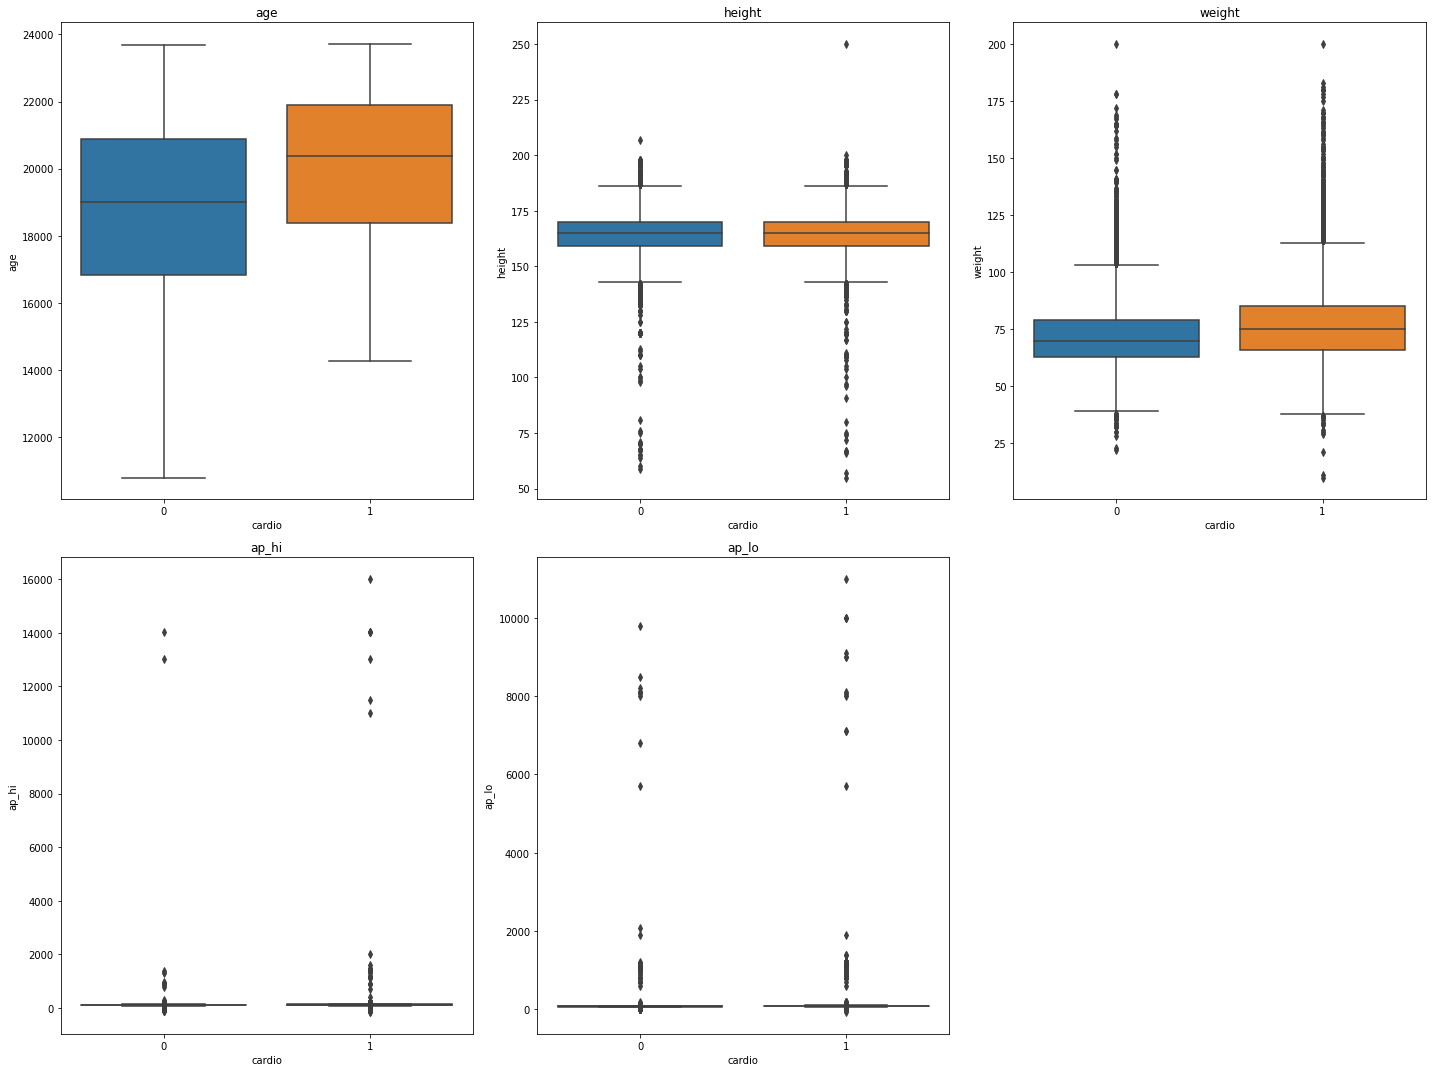

In [433]:
box_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

plt.figure(figsize=(20,15))
for i, column in enumerate(box_cols, 1):
    plt.subplot(2, 3, i)
    plt.title(f'{column}')
    sns.boxplot(y=df[column], x=df['cardio'], data=df)
plt.tight_layout()
plt.show()
# lots of significant outliers, possible ways to deal: drop, replcace with stat values (IQR, mean, median, mode, etc.), 
# impute as None with IterativeImputer, mark as 1 in a new binary feature
# correct some of them (ap_hi, ap_lo) - it is obvious we have human misstake when filling dataset (ap_hi <-> ap_lo, 
# too high or low values, wrong floating point /= 10, 100 o 1000)
# also there's some meaningful difference in quantiles in slice of target variable

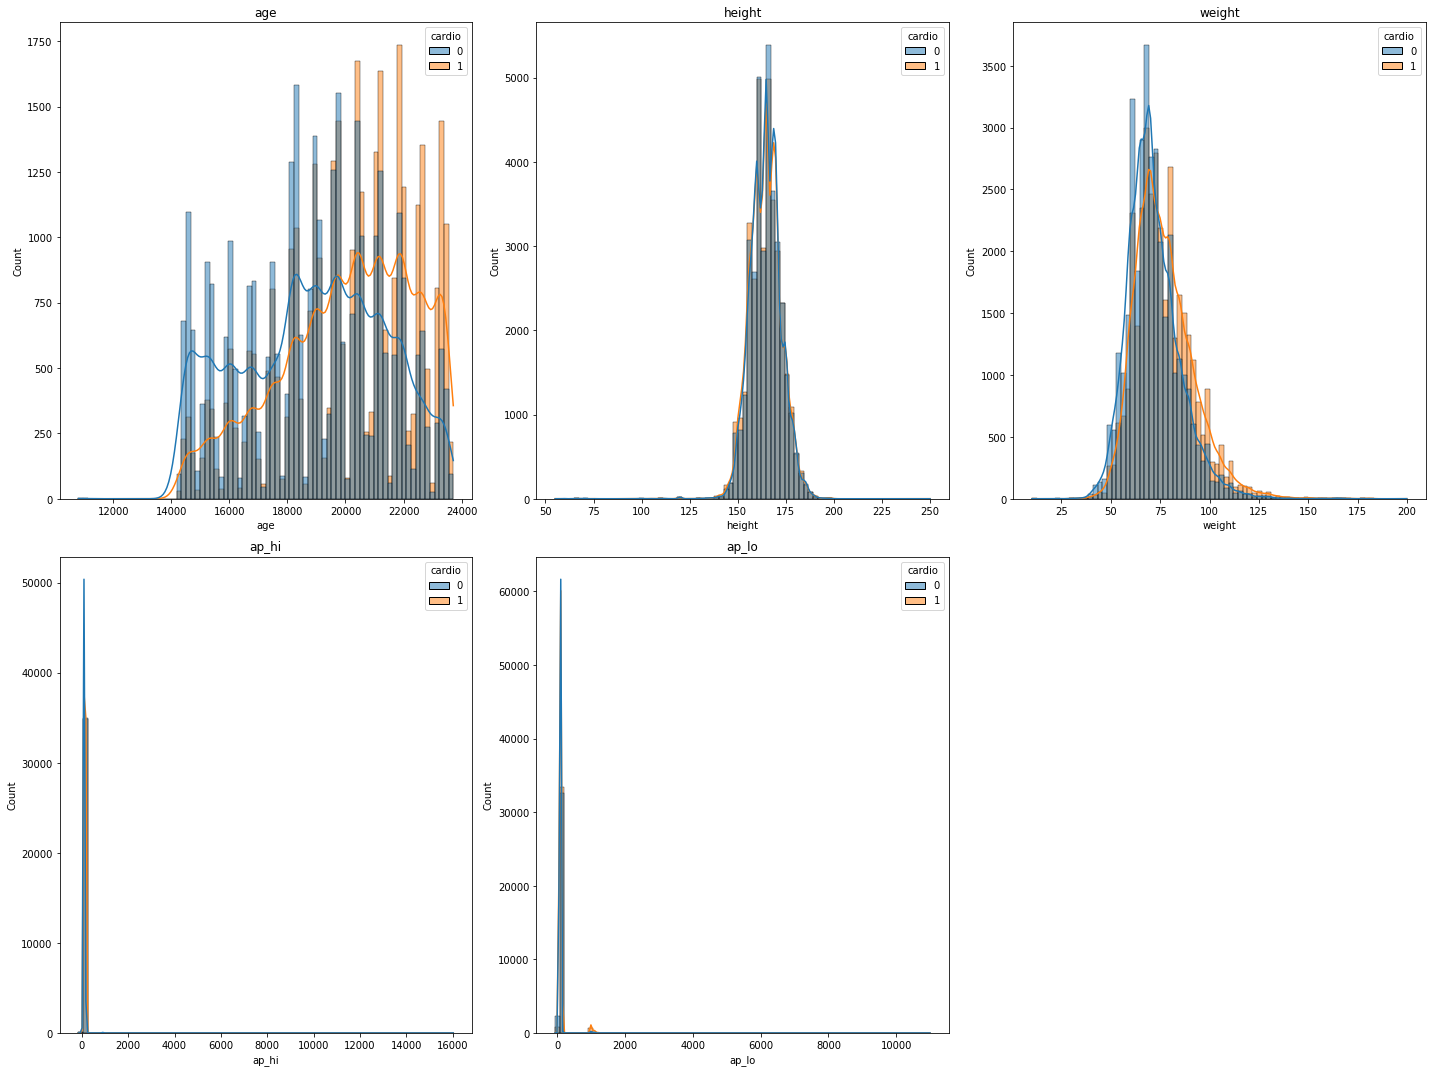

In [434]:
plt.figure(figsize=(20,15))
for i, column in enumerate(box_cols, 1):
    plt.subplot(2, 3, i)
    plt.title(f'{column}')
    sns.histplot(data=df, x=column, hue='cardio', bins=80, kde=True)
plt.tight_layout()
plt.show()
# data is skewed

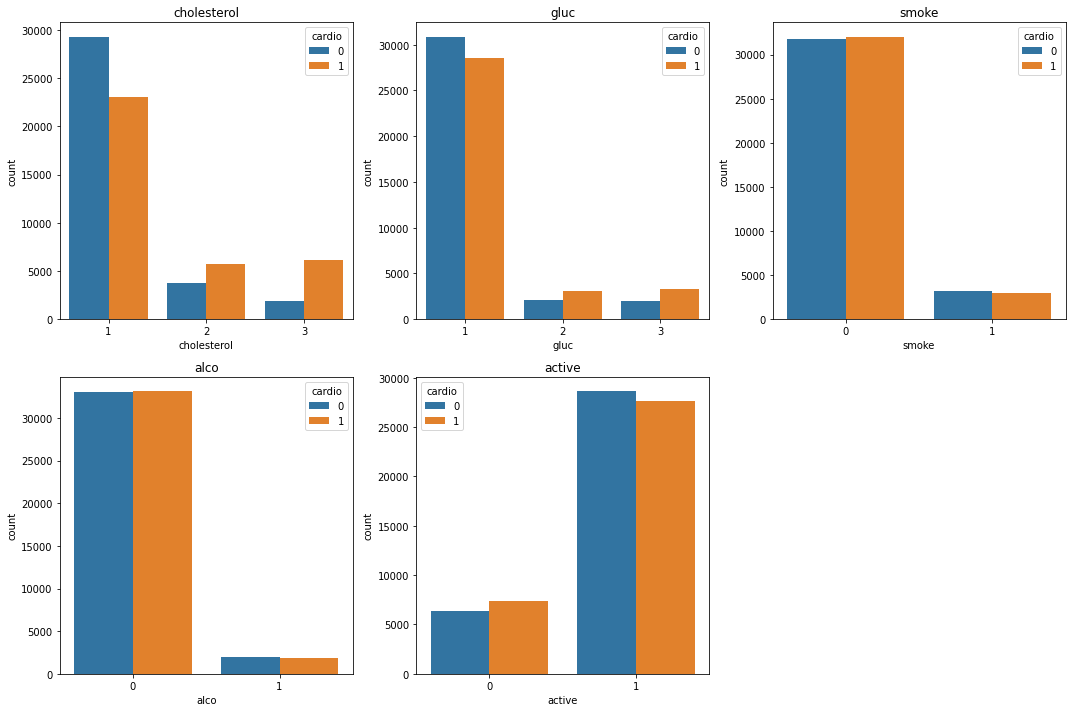

In [435]:
cat_cols = ['cholesterol', 'gluc', 'smoke', 'alco', 'active']

plt.figure(figsize=(15, 10))
for idx, column in enumerate(cat_cols, 1):
    plt.subplot(2, 3, idx)
    plt.title(f'{column}')
    sns.countplot(x=column, hue='cardio', data=df)
plt.tight_layout()
plt.show()
# not pretty much informative variables

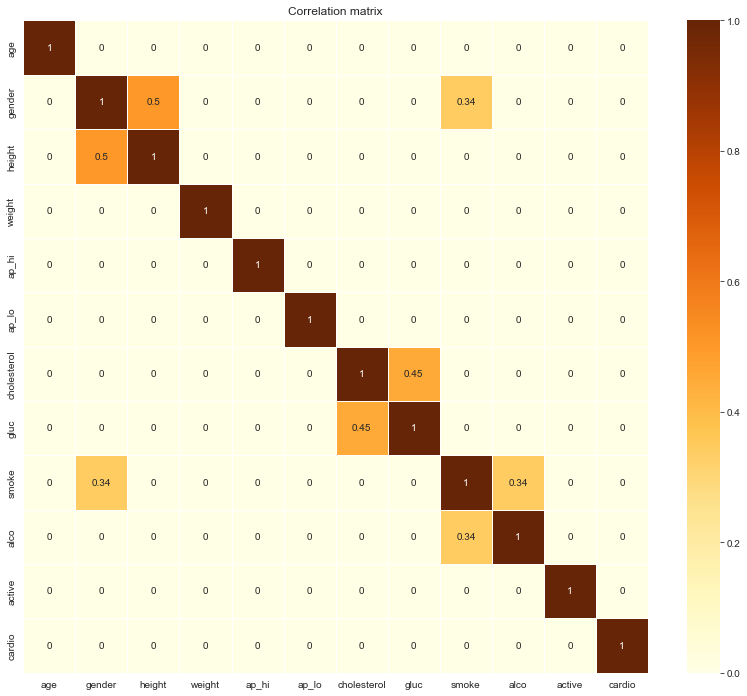

In [561]:
plt.figure(figsize = (14,12))
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='YlOrBr')
plt.title('Correlation matrix')
plt.show()
# assuming significant correlation as > 0.66 we may conclude that there's no high linear dependence between variables
# 0.5 for gender and height, which sounds rather reasonable: 
# increase from 0 (women) to 1 (men) => increase height - men are usually taller

In [8]:
base = LGBMClassifier(verbose=-1)

In [230]:
def remove_outliers(X, method='drop'):
    if method == 'drop':
        X = X[X.ap_hi.between(50,250)]  
        X = X[X.ap_lo.between(30,170)]  
        X = X[X.ap_hi > X.ap_lo]
        X = X[X.height.between(80, 200)] 
        X = X[X.weight.between(30,190)]
    else:
        pass
    return X

class Preprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.iqr_dict = {}
    
    def fit(self, X, y=None):
        for column in ['age', 'height', 'weight', 'ap_hi', 'ap_lo']:
            q1 = np.quantile(X[column], 0.25)
            q3 = np.quantile(X[column], 0.75)
            iq_low = q1 - 1.5 * (q3 - q1)
            iq_high = q3 + 1.5 * (q3 - q1)
            self.iqr_dict[f'{column}_iq_high'] = iq_high
            self.iqr_dict[f'{column}_iq_low'] = iq_low
        return self
    
    def transform(self, X):
        for column in ['age', 'height', 'weight', 'ap_hi', 'ap_lo']:
            X.loc[X[column] > self.iqr_dict[f'{column}_iq_high'], column] = self.iqr_dict[f'{column}_iq_high']
            X.loc[X[column] < self.iqr_dict[f'{column}_iq_low'], column] = self.iqr_dict[f'{column}_iq_low']
        X.age = X.age/365.25
        X.height = X.height.astype(np.float32)
        X.ap_hi = X.ap_hi.astype(np.float32)
        X.ap_lo = X.ap_lo.astype(np.float32)
        X = reduce_memory(X)
        X.gender = X.gender.apply(lambda x: x-1)
        X.gender = X.gender.astype(np.uint8)
        X['ratio'] = X.ap_hi / X.ap_lo
        X['bad_signs'] = X['gluc'] + X['smoke'] + X['alco'] - X['active']
        X['bmi'] = X['weight'].values / np.square(X['height'])
        return X
    
class BestSet(BaseEstimator, TransformerMixin):
    def __init__(self, estimator=None, k_features=8, scoring=f1_score, test_size=0.2, random_state=42):
        self.scoring = scoring
        self.k_features = k_features
        self.test_size = test_size
        self.estimator = estimator
        self.random_state = random_state

    def fit(self, X, y):
        if isinstance(X, pd.DataFrame):
            X, y = X.values, y.values
        X_train, X_test, y_train, y_test = train_test_split(X,
                                                            y, 
                                                            test_size=self.test_size, 
                                                            stratify=y,
                                                            random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores, subsets = [], []
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        return self

    def transform(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values
        best_indices = self.subsets_[np.argmax(self.scores_)]
        return X[:, best_indices]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict_proba(X_test[:, indices])[:,1]
        score = self.scoring(y_test, y_pred)
        return score

In [475]:
# df = remove_outliers(df)

In [485]:
continuos_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'ratio', 'bad_signs', 'bmi']
cat_cols = ['gluc', 'cholesterol']
base_cols = ['gender', 'smoke', 'alco', 'active']

feats = make_column_transformer((ce.one_hot.OneHotEncoder(), cat_cols),
                                (StandardScaler(), continuos_cols),
                                remainder='passthrough')

pipe = make_pipeline(Preprocessor(),
                     feats,
                     BestSet(estimator=base, scoring=roc_auc_score),
                     LGBMClassifier(verbose=-1))

In [699]:
# dataframe to store metrics
metrics = pd.DataFrame(columns=['roc_auc', 'recall', 'precision', 'f_score', 'accuracy', 'threshold', 'accuracy_05'],
                       index=['LogisticRegression', 'RandomForest', 'GradientBoosting'])

### Boosting

In [690]:
X, y = df.drop('cardio', axis=1), df['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, stratify=y_train, random_state=42)
X_train.shape, X_valid.shape, X_test.shape

((44800, 11), (11200, 11), (14000, 11))

In [478]:
# base
pipe.fit(X_train, y_train)
roc_auc_score(y_test, pipe.predict_proba(X_test)[:,1])

0.7930234808063428

In [691]:
X_train = pipe[:-1].fit_transform(X_train, y_train)
X_valid = pipe[:-1].transform(X_valid)
X_test = pipe[:-1].transform(X_test)

fit_params = {'early_stopping_rounds': 10,  
              'eval_set': [(X_valid, y_valid)],  
              'eval_metric': 'auc',
              'verbose': False
             }

model_params = {
                'objective': 'binary',
                'n_estimators': 1000,
                'n_jobs': -1,
                'is_unbalance': True,
                'random_state': 42,
}

def objective(trial):
    param_trials = {
                    'max_depth': trial.suggest_int('max_depth', 3, 9),
                    'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
                    'reg_alpha': trial.suggest_float('reg_alpha', 1., 5.),
                    'reg_lambda': trial.suggest_float('reg_lambda', 1., 5.),
                    'num_leaves': trial.suggest_int('num_leaves', 20, 265),
                    'subsample': trial.suggest_float('subsample', 0.3, 1.),
                    'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 1.),
                    'max_bin': trial.suggest_int('max_bin', 60, 260),
                    'min_child_samples': trial.suggest_int('min_child_samples', 120, 260),
                    'min_child_weight': trial.suggest_float('min_child_weight', 0.001, 0.1),
                    'boosting_type': trial.suggest_categorical('boosting_type', ['goss', 'gbdt']),
                    }

    param_trials.update(model_params)
    opt_model = LGBMClassifier(**param_trials)
    
    opt_model.fit(X_train, y_train, **fit_params)
    
    y_pred = opt_model.predict_proba(X_valid)[:,1]
    score = roc_auc_score(y_valid, y_pred)
    
    return score

In [512]:
optuna.logging.set_verbosity(optuna.logging.FATAL)
study = optuna.create_study(sampler=TPESampler(seed=42), direction="maximize")
study.optimize(objective, n_trials=1000, timeout=2000)

print(f'Number of completed trials: {len(study.trials)}')
print('Best trial')
trial = study.best_trial
print(f'Best score: {trial.value}')
print('Best params')
for key, value in trial.params.items():
    print(f'{key}: {value}')  # 0.8000328826624983

Number of completed trials: 1000
Best trial
Best score: 0.8000328826624983
Best params
max_depth: 4
learning_rate: 0.11731020097521154
reg_alpha: 1.5292791791111564
reg_lambda: 2.6058822597573483
num_leaves: 200
subsample: 0.8646054155512385
colsample_bytree: 0.7433747130821421
max_bin: 100
min_child_samples: 125
min_child_weight: 0.08400618866390441
boosting_type: gbdt


In [696]:
model_params = {'objective': 'binary',
                'n_estimators': 1000,
                'n_jobs': -1,
                'is_unbalance': True,
                'random_state': 42,
                'max_depth': 4, # 4
                'learning_rate': 0.11731020097521154, # 0.11242732907415898
                'reg_alpha': 1.5292791791111564, # 1.6775798906418409
                'reg_lambda': 2.6058822597573483, # 3.1374644793313244
                'num_leaves': 200, # 172
                'subsample': 0.8646054155512385, # 0.8280692819590448
                'colsample_bytree': 0.7433747130821421, # 0.769574642975411
                'max_bin': 100, # 83
                'min_child_samples': 125, # 122
                'min_child_weight': 0.08400618866390441, # 0.09058878680425073
                'boosting_type': 'gbdt',
               }

In [697]:
%%time
# restore raw datasets
X, y = df.drop('cardio', axis=1), df['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, stratify=y_train, 
                                                      random_state=42)

pipe = make_pipeline(Preprocessor(),
                     feats,
                     BestSet(estimator=base, scoring=roc_auc_score),
                     LGBMClassifier(**model_params))

# not good, but I cannot find out a good way to transform eval_set before fitting model
X_train = pipe[:-1].fit_transform(X_train, y_train)
X_valid = pipe[:-1].transform(X_valid)
X_test = pipe[:-1].transform(X_test)

fit_params = {'early_stopping_rounds': 10,  
              'eval_set': [(X_valid, y_valid)],  
              'eval_metric': 'auc',
              'verbose': False
             }

scores = cross_validation(pipe[-1], X_train, y_train, scoring='roc_auc', cv=10)

pipe[-1].fit(X_train, y_train, **fit_params)
print()

Меры правильности перекрекстной оценки: [0.7948973  0.8009782  0.80724793 0.80245958 0.78980833 0.79394398
 0.78932493 0.79930511 0.79705961 0.80410471]
Точность перекретсной оценки: 0.798 +/- 0.006

CPU times: total: 2min 4s
Wall time: 10.9 s


In [698]:
lgbm_train_pred = pipe[-1].predict(X_train)
lgbm_test_pred = pipe[-1].predict(X_test)

lgbm_train_probs = pipe[-1].predict_proba(X_train)[:,1]
lgbm_test_probs = pipe[-1].predict_proba(X_test)[:,1]

report(y_train, lgbm_train_pred, y_test, lgbm_test_pred, lgbm_train_probs, lgbm_test_probs)

Train
               precision    recall  f1-score   support

           0      0.727     0.781     0.753     22414
           1      0.763     0.707     0.734     22386

    accuracy                          0.744     44800
   macro avg      0.745     0.744     0.743     44800
weighted avg      0.745     0.744     0.743     44800

Test
               precision    recall  f1-score   support

           0      0.719     0.768     0.743      7004
           1      0.751     0.699     0.724      6996

    accuracy                          0.734     14000
   macro avg      0.735     0.734     0.734     14000
weighted avg      0.735     0.734     0.734     14000

Train ROC_AUC: 0.8144, Test ROC_AUC: 0.8002
Train logloss: 8.855, Test logloss: 9.192
Confusion Matrix 
 col_0      0     1
cardio            
0       5382  1622
1       2104  4892


In [688]:
scores = cross_validation(pipe[-1], X_train, y_train, scoring='roc_auc', cv=5)
# no significant fluctuations

Меры правильности перекрекстной оценки: [0.7982276  0.80515051 0.79132422 0.79379619 0.80066756]
Точность перекретсной оценки: 0.798 +/- 0.005


In [352]:
# calibration plot
def show_proba_calibration_plots(y_predicted_probs, y_true_labels):
    preds_with_true_labels = np.array(list(zip(y_predicted_probs, y_true_labels)))

    thresholds = []
    precisions = []
    recalls = []
    f1_scores = []

    for threshold in np.linspace(0.1, 0.9, 9):
        thresholds.append(threshold)
        precisions.append(precision_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        recalls.append(recall_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        f1_scores.append(f1_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))

    scores_table = pd.DataFrame({'f1':f1_scores,
                                 'precision':precisions,
                                 'recall':recalls,
                                 'probability':thresholds}).sort_values('f1', ascending=False).round(3)
  
    figure = plt.figure(figsize = (15, 5))

    plt1 = figure.add_subplot(121)
    plt1.plot(thresholds, precisions, label='Precision', linewidth=4)
    plt1.plot(thresholds, recalls, label='Recall', linewidth=4)
    plt1.plot(thresholds, f1_scores, label='F1', linewidth=4)
    plt1.set_ylabel('Scores')
    plt1.set_xlabel('Probability threshold')
    plt1.set_title('Probabilities threshold calibration')
    plt1.legend(bbox_to_anchor=(0.25, 0.25))   
    plt1.table(cellText = scores_table.values,
               colLabels = scores_table.columns, 
               colLoc = 'center', cellLoc = 'center', loc = 'bottom', bbox = [0, -1.3, 1, 1])
    plt2 = figure.add_subplot(122)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 0][:, 0], 
              label='Another class', color='royalblue', alpha=1)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 1][:, 0], 
              label='Main class', color='darkcyan', alpha=0.8)
    plt2.set_ylabel('Number of examples')
    plt2.set_xlabel('Probabilities')
    plt2.set_title('Probability histogram')
    plt2.legend(bbox_to_anchor=(1, 1))

    plt.show()

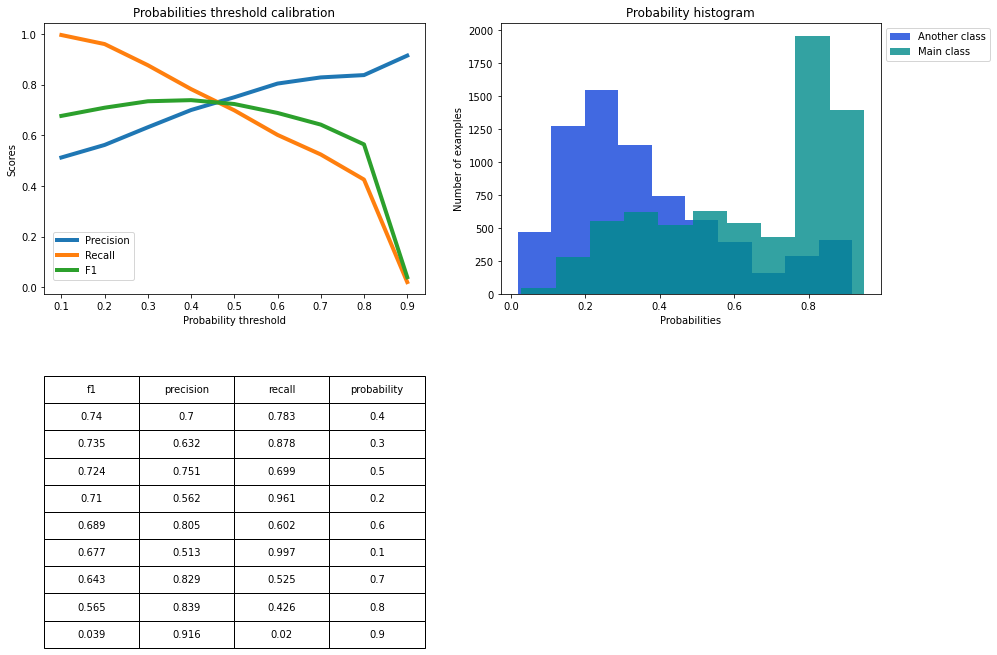

In [507]:
show_proba_calibration_plots(lgbm_test_probs, y_test)  # no big sense as we have almost balanced data

In [700]:
precision, recall, thresholds = precision_recall_curve(y_test, lgbm_test_probs)
fscore = (2 * precision * recall) / (precision + recall)

ix = np.argmax(fscore)

print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f for f-score' % (thresholds[ix], 
                                                                                    fscore[ix],
                                                                                    precision[ix],
                                                                                    recall[ix]))
roc_auc = roc_auc_score(y_test, lgbm_test_probs)
acc_base = accuracy_score(y_test, lgbm_test_pred)  # with threshold = 0.5 - best as balanced
accuracy = accuracy_score(y_test, lgbm_test_probs >= thresholds[ix])
print(f'Best accuracy: {accuracy:.3f}, base: {acc_base:.3f}')

metrics.loc['GradientBoosting', :] = [roc_auc, recall[ix], precision[ix], fscore[ix], accuracy, thresholds[ix], acc_base]

Best Threshold=0.379821, F-Score=0.742, Precision=0.689, Recall=0.804 for f-score
Best accuracy: 0.721, base: 0.734


In [702]:
cm = confusion_matrix(y_test, lgbm_test_probs >= thresholds[ix])
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
total_charges_without_tests = (TP + FN) * 20000
total_charges_with_tests = np.sum(cm) * 1400 + (FN + TP) * 15000
ml_charges = (TP + FP) * 1400 + TP * 15000 + FN * 20000
print('расходы, если не делать тест и ждать симптомов:', total_charges_without_tests)
print('расходы, если делать тест всем и лечить группу больных:', total_charges_with_tests)
print('расходы, если использовать МЛ:', ml_charges)

print('Расходы "решение не делать тесты - расходы с МL:"', total_charges_without_tests - ml_charges)
print('Расходы "решение не делать тесты - расходы сделать тесты всем":', total_charges_without_tests - total_charges_with_tests)
print('Расходы "сделать тесты всем - решение делать тесты ML":', total_charges_with_tests - ml_charges)

расходы, если не делать тест и ждать симптомов: 139920000
расходы, если делать тест всем и лечить группу больных: 124540000
расходы, если использовать МЛ: 123224000
Расходы "решение не делать тесты - расходы с МL:" 16696000
Расходы "решение не делать тесты - расходы сделать тесты всем": 15380000
Расходы "сделать тесты всем - решение делать тесты ML": 1316000


расходы, если не делать тест и ждать симптомов: 139920000
расходы, если делать тест всем и лечить группу больных: 124540000
расходы, если использовать МЛ: 122736800
Расходы "решение не делать тесты - расходы с МL:" 17183200
Расходы "решение не делать тесты - расходы сделать тесты всем": 15380000
Расходы "сделать тесты всем - решение делать тесты ML": 1803200


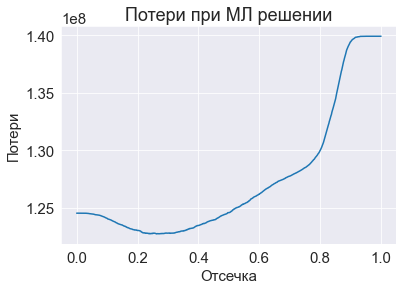

Business threshold: 0.26226226226226224
F-score threshold: 0.37982072936627603


In [703]:
bm = business_threshold_calibrate(y_test, lgbm_test_probs, n=1000,
                                  rubl_test=1400, rubl_early_treatment=15000, rubl_late_treatment=20000)
print(f'Business threshold: {bm}')
print(f'F-score threshold: {thresholds[ix]}')

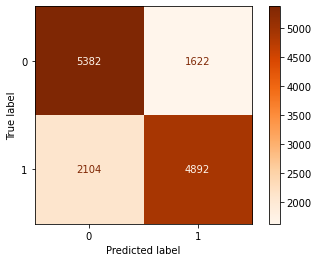

In [535]:
ConfusionMatrixDisplay.from_estimator(pipe[-1], X_test, y_test, cmap='Oranges') # without calibration: raw
plt.show()

Confusion matrix, without normalization


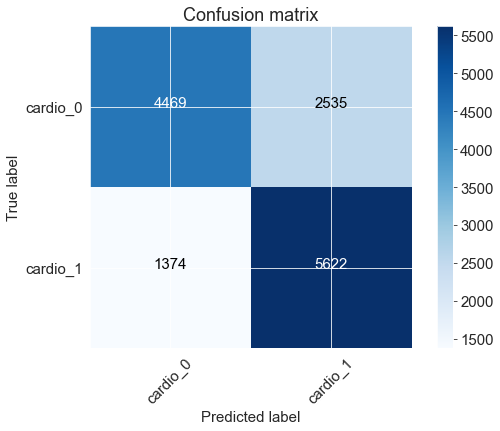

In [575]:
import itertools # with ML calibaration

font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, lgbm_test_probs>thresholds[ix])
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=['cardio_0', 'cardio_1'], normalize=False,
                      title='Confusion matrix',)
plt.show()

Confusion matrix, without normalization


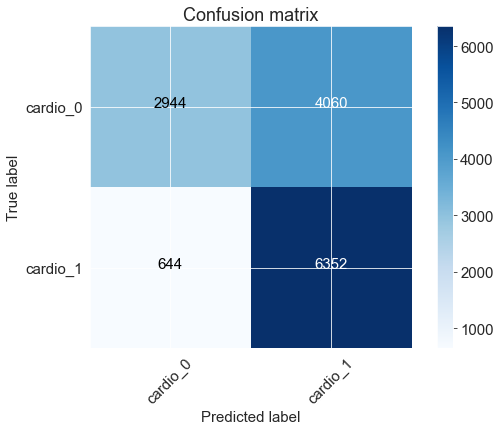

In [704]:
cnf_matrix = confusion_matrix(y_test, lgbm_test_probs>bm) # with business calibration
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=['cardio_0', 'cardio_1'], normalize=False,
                      title='Confusion matrix',)
plt.show()
# better make more tests than fight with illness

### Shap plots to explain the model's behaviour

In [347]:
all_columns = np.array(X.columns.tolist() + ['ratio', 'bad_signs', 'bmi'])
X_ = pd.DataFrame(data=X_train, columns=all_columns[list(pipe[2].subsets_[np.argmax(pipe[2].scores_)])])

In [349]:
explainer = shap.TreeExplainer(pipe[-1])

data = pd.Series(data=X_.iloc[np.random.randint(len(X_)), :].values, index=X_.columns.tolist())
shap_values = explainer.shap_values(data.values.reshape(1,-1))

In [350]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data)

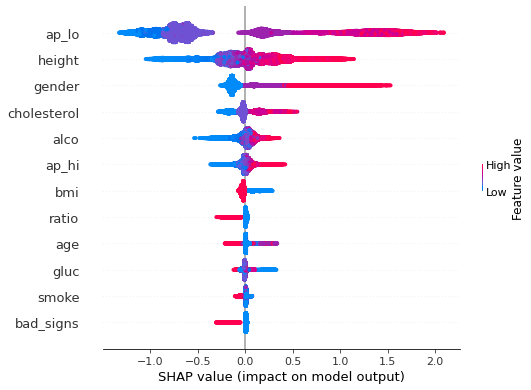

In [351]:
shap.initjs()

shap_values = explainer.shap_values(X_)
shap.summary_plot(shap_values[1], X_)
# here we can see that high ap_lo leads to cardio issues, taller people suffers from illness more (a cloud in the middle 
# looks like there's a dependence with another feauture - maybe gender), gender-men is more common to have illness,
# high level of cholesterol is also bad for health - obviously, ETC.

### Forest

In [621]:
X, y = df.drop('cardio', axis=1), df['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=42)

forest_pipe = make_pipeline(Preprocessor(),
                            feats,
                            #BestSet(estimator=ExtraTreesClassifier(random_state=42), scoring=roc_auc_score), # too slow
                            SelectFromModel(estimator=ExtraTreesClassifier(bootstrap=True, random_state=42), 
                                            max_features=X_train.shape[1]-3),
                            ExtraTreesClassifier(bootstrap=True, oob_score=True, random_state=42)).fit(X_train, y_train)

roc_auc_score(y_test, pipe.predict_proba(X_test)[:,1])

0.7484839360128952

In [622]:
forest_train_pred = forest_pipe.predict(X_train)
forest_test_pred = forest_pipe.predict(X_test)

forest_train_probs = forest_pipe.predict_proba(X_train)[:,1]
forest_test_probs = forest_pipe.predict_proba(X_test)[:,1]

report(y_train, forest_train_pred, y_test, forest_test_pred, forest_train_probs, forest_test_probs)

Train
               precision    recall  f1-score   support

           0      0.641     0.889     0.745     24515
           1      0.819     0.502     0.622     24485

    accuracy                          0.696     49000
   macro avg      0.730     0.696     0.684     49000
weighted avg      0.730     0.696     0.684     49000

Test
               precision    recall  f1-score   support

           0      0.635     0.880     0.738     10506
           1      0.805     0.494     0.612     10494

    accuracy                          0.687     21000
   macro avg      0.720     0.687     0.675     21000
weighted avg      0.720     0.687     0.675     21000

Train ROC_AUC: 0.7637, Test ROC_AUC: 0.7417
Train logloss: 10.513, Test logloss: 10.807
Confusion Matrix 
 col_0      0     1
cardio            
0       9247  1259
1       5312  5182


In [623]:
scores = cross_validation(forest_pipe[-1], X_train, y_train, scoring='roc_auc', cv=10)

Меры правильности перекрекстной оценки: [0.72344044 0.74177913 0.73709258 0.72414514 0.73745077 0.74202748
 0.74064156 0.73026779 0.73978267 0.73366205]
Точность перекретсной оценки: 0.735 +/- 0.007


In [705]:
X, y = df.drop('cardio', axis=1), df['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=42)

def objective(trial):
    param_forest = {
                    'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
                    'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
                    'max_depth': trial.suggest_int('max_depth', 3, 9),
                    'min_samples_split': trial.suggest_int('min_samples_split', 2, 15),
                    'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 15),
                    'min_weight_fraction_leaf': trial.suggest_float('min_weight_fraction_leaf', 0., .5),
                    'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
                    'min_impurity_decrease': trial.suggest_float('min_impurity_decrease', 0., 2.),
                    'bootstrap': True,
                    'n_jobs': -1,
                    'random_state': 42,
                    'warm_start': True, 
                    'class_weight': trial.suggest_categorical('class_weight', ['balanced', 'balanced_subsample']),
                    'ccp_alpha': trial.suggest_float('ccp_alpha', 0., 3.),
                    'max_samples': trial.suggest_float('max_samples', 0., 1.)
    }

    opt_model = make_pipeline(Preprocessor(),
                              feats,
                              SelectFromModel(estimator=ExtraTreesClassifier(random_state=42), max_features=X_train.shape[1]-3),
                              ExtraTreesClassifier(bootstrap=True, random_state=42))
    
    opt_model.fit(X_train, y_train)
    
    y_pred = opt_model.predict_proba(X_test)[:,1]
    score = roc_auc_score(y_test, y_pred)
    
    return score

In [ ]:
optuna.logging.set_verbosity(optuna.logging.INFO)
study = optuna.create_study(sampler=TPESampler(seed=42), direction="maximize")
study.optimize(objective, n_trials=300, timeout=2000)

print(f'Number of completed trials: {len(study.trials)}')
print('Best trial')
trial = study.best_trial
print(f'Best score: {trial.value}')
print('Best params')
for key, value in trial.params.items():
    print(f'{key}: {value}')

In [376]:
# stratifiedKFold to select model
from sklearn.model_selection import StratifiedKFold

def vote(predictions: list, weights: list):
    predictions = np.asarray(predictions).T
    maj_vote = np.apply_along_axis(lambda x: np.argmax(np.bincount(x, weights=weights)), axis=1, arr=predictions)
    return maj_vote

In [706]:
forest_params = {'n_estimators': 303,
                 'criterion': 'gini',
                 'max_depth': 5,
                 'min_samples_split': 35,
                 'min_samples_leaf': 13,
                 'max_features': 'auto',
                 'max_samples': 0.4722149251619493}

In [625]:
test_results, train_roc, test_pred, train_f1, train_acc = [], [], [], [], []
skf = StratifiedKFold(n_splits=5)
forests = []

for i, (train_index, valid_index) in enumerate(skf.split(X_train, y_train), 1):
    X_train_fold, X_test_fold = X_train.iloc[train_index, :], X_train.iloc[valid_index, :]
    y_train_fold, y_test_fold = y_train.values[train_index], y_train.values[valid_index]

    model = make_pipeline(Preprocessor(),
                          feats,
                          SelectFromModel(estimator=ExtraTreesClassifier(bootstrap=True,
                                                                         random_state=42), max_features=X_train.shape[1]-3),
                          ExtraTreesClassifier(bootstrap=True, 
                                               oob_score=True, # make cross-validation analogue
                                               random_state=42,
                                               **forest_params)).fit(X_train_fold, y_train_fold)

    test_labels = model.predict(X_test)
    test_pred.append(test_labels)
    
    train_proba = model.predict_proba(X_train_fold)[:,1]
    train_roc.append(roc_auc_score(y_train_fold, train_proba))
    
    train_labels = model.predict(X_train_fold)
    train_f1.append(f1_score(y_train_fold, train_labels))
    train_acc.append(accuracy_score(y_train_fold, train_labels))
    
    pred_test = model.predict_proba(X_test)[:,1]
    test_results.append(pred_test)
    print(f'Trial_{i}')
    print(classification_report(y_test, test_labels, digits=3), '\n', '='*20, f'OOB: {model[-1].oob_score_:.4f}', '='*25)
    forests.append(model)

final_test = np.array(test_results).mean(axis=0)
test_pred = vote(test_pred, weights=[1.,1.,1., 1., 1.])

Trial_1
              precision    recall  f1-score   support

           0      0.674     0.808     0.735     10506
           1      0.760     0.609     0.676     10494

    accuracy                          0.708     21000
   macro avg      0.717     0.708     0.706     21000
weighted avg      0.717     0.708     0.706     21000
 
 ==================== OOB: 0.7117 =========================
Trial_2
              precision    recall  f1-score   support

           0      0.673     0.814     0.737     10506
           1      0.764     0.603     0.674     10494

    accuracy                          0.709     21000
   macro avg      0.718     0.709     0.706     21000
weighted avg      0.718     0.709     0.706     21000
 
 ==================== OOB: 0.7096 =========================
Trial_3
              precision    recall  f1-score   support

           0      0.673     0.809     0.735     10506
           1      0.761     0.607     0.675     10494

    accuracy                        

In [626]:
print(f'train mean accuracy: {np.array(train_acc).mean():.4f}, test accuracy: {accuracy_score(y_test, test_pred):.4f}')
print(f'train mean f1: {np.array(train_f1).mean():.4f}, test f1: {f1_score(y_test, test_pred):.4f}')
print(f'train mean auc: {np.array(train_roc).mean():.4f}, test auc: {roc_auc_score(y_test, final_test):.4f}')

train mean accuracy: 0.7112, test accuracy: 0.7087
train mean f1: 0.6789, test f1: 0.6758
train mean auc: 0.7644, test auc: 0.7603


In [707]:
forest = forests[-1]
scores = cross_validation(forest, X_train, y_train, cv=10, scoring='roc_auc')

Меры правильности перекрекстной оценки: [0.77367027 0.78598914 0.79488668 0.78783237 0.78377173 0.78546516
 0.7903802  0.77783542 0.79467775 0.79623677]
Точность перекретсной оценки: 0.787 +/- 0.007


In [708]:
forest_train_pred = forest.predict(X_train)
forest_test_pred = forest.predict(X_test)

forest_train_probs = forest.predict_proba(X_train)[:,1]
forest_test_probs = forest.predict_proba(X_test)[:,1]

report(y_train, forest_train_pred, y_test, forest_test_pred, forest_train_probs, forest_test_probs)

Train
               precision    recall  f1-score   support

           0      0.677     0.809     0.737     24515
           1      0.763     0.613     0.680     24485

    accuracy                          0.711     49000
   macro avg      0.720     0.711     0.709     49000
weighted avg      0.720     0.711     0.709     49000

Test
               precision    recall  f1-score   support

           0      0.674     0.808     0.735     10506
           1      0.760     0.609     0.677     10494

    accuracy                          0.709     21000
   macro avg      0.717     0.709     0.706     21000
weighted avg      0.717     0.709     0.706     21000

Train ROC_AUC: 0.7645, Test ROC_AUC: 0.7605
Train logloss: 9.968, Test logloss: 10.056
Confusion Matrix 
 col_0      0     1
cardio            
0       8491  2015
1       4099  6395


In [711]:
precision, recall, thresholds = precision_recall_curve(y_test, forest_test_probs)
fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))
roc_auc = roc_auc_score(y_test, forest_test_probs)
acc_base = accuracy_score(y_test, forest_test_pred)
acc = accuracy_score(y_test, forest_test_probs >= thresholds[ix])
metrics.loc['RandomForest', :] = [roc_auc, recall[ix], precision[ix], fscore[ix], acc, thresholds[ix], acc_base]

Best Threshold=0.401014, F-Score=0.704, Precision=0.647, Recall=0.772


In [712]:
cm = confusion_matrix(y_test, forest_test_probs >= thresholds[ix])
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
total_charges_without_tests = (TP + FN) * 20000
total_charges_with_tests = np.sum(cm) * 1400 + (FN + TP) * 15000
ml_charges = (TP + FP) * 1400 + TP * 15000 + FN * 20000
print('расходы, если не делать тест и ждать симптомов:', total_charges_without_tests)
print('расходы, если делать тест всем и лечить группу больных:', total_charges_with_tests)
print('расходы, если использовать МЛ:', ml_charges)

print('Расходы "решение не делать тесты - расходы с МL:"', total_charges_without_tests - ml_charges)
print('Расходы "решение не делать тесты - расходы сделать тесты всем":', total_charges_without_tests - total_charges_with_tests)
print('Расходы "сделать тесты всем - решение делать тесты ML":', total_charges_with_tests - ml_charges)
# charges with forest ML are greater!!!

расходы, если не делать тест и ждать симптомов: 209880000
расходы, если делать тест всем и лечить группу больных: 186810000
расходы, если использовать МЛ: 186905800
Расходы "решение не делать тесты - расходы с МL:" 22974200
Расходы "решение не делать тесты - расходы сделать тесты всем": 23070000
Расходы "сделать тесты всем - решение делать тесты ML": -95800


расходы, если не делать тест и ждать симптомов: 209880000
расходы, если делать тест всем и лечить группу больных: 186810000
расходы, если использовать МЛ: 185746800
Расходы "решение не делать тесты - расходы с МL:" 24133200
Расходы "решение не делать тесты - расходы сделать тесты всем": 23070000
Расходы "сделать тесты всем - решение делать тесты ML": 1063200


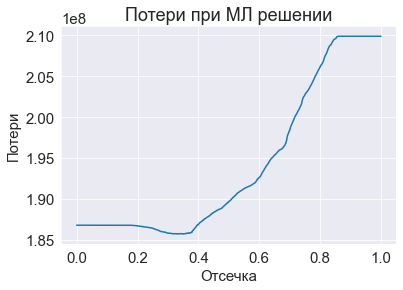

Business threshold: 0.34934934934934936
F-score threshold: 0.40101388900365226


In [713]:
bm = business_threshold_calibrate(y_test, forest_test_probs, n=1000,
                                  rubl_test=1400, rubl_early_treatment=15000, rubl_late_treatment=20000)

print(f'Business threshold: {bm}')
print(f'F-score threshold: {thresholds[ix]}')

Confusion matrix, without normalization


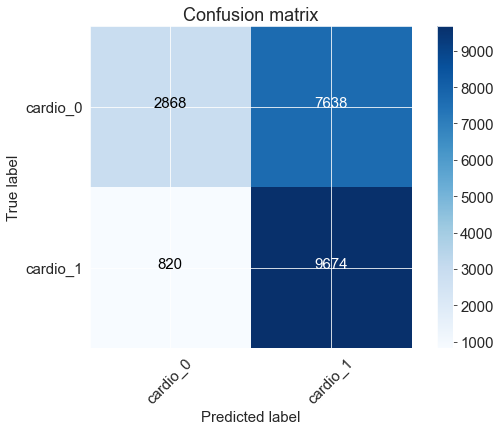

In [714]:
cnf_matrix = confusion_matrix(y_test, forest_test_probs>bm) # with business calibration
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=['cardio_0', 'cardio_1'], normalize=False,
                      title='Confusion matrix',)
plt.show()

### LogisticRegression

In [268]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LogisticRegression

In [715]:
X, y = df.drop('cardio', axis=1), df['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=42)

In [669]:
log_pipe = make_pipeline(Preprocessor(),
                         feats,
                         ##BestSet(estimator=LogisticRegression(), scoring=roc_auc_score),
                         ##KernelPCA(n_components=9, kernel='linear', degree=2, random_state=42),
                         PolynomialFeatures(degree=3, interaction_only=True),
                         SelectFromModel(estimator=LogisticRegression(random_state=42), max_features=100),
                         LogisticRegression(random_state=42)).fit(X_train, y_train)

In [670]:
log_train_pred = log_pipe.predict(X_train)
log_test_pred = log_pipe.predict(X_test)

log_train_probs = log_pipe.predict_proba(X_train)[:,1]
log_test_probs = log_pipe.predict_proba(X_test)[:,1]

report(y_train, log_train_pred, y_test, log_test_pred, log_train_probs, log_test_probs)

Train
               precision    recall  f1-score   support

           0      0.708     0.773     0.739     24515
           1      0.749     0.680     0.713     24485

    accuracy                          0.727     49000
   macro avg      0.729     0.727     0.726     49000
weighted avg      0.729     0.727     0.726     49000

Test
               precision    recall  f1-score   support

           0      0.703     0.774     0.737     10506
           1      0.748     0.673     0.709     10494

    accuracy                          0.724     21000
   macro avg      0.726     0.723     0.723     21000
weighted avg      0.726     0.724     0.723     21000

Train ROC_AUC: 0.7822, Test ROC_AUC: 0.7778
Train logloss: 9.442, Test logloss: 9.549
Confusion Matrix 
 col_0      0     1
cardio            
0       8128  2378
1       3428  7066


In [671]:
scores = cross_validation(log_pipe, X_train, y_train, scoring='roc_auc', cv=10)

Меры правильности перекрекстной оценки: [0.76999255 0.77810509 0.78878939 0.77653116 0.77952025 0.77655479
 0.78939644 0.77743384 0.78965775 0.78573563]
Точность перекретсной оценки: 0.781 +/- 0.006


In [716]:
precision, recall, thresholds = precision_recall_curve(y_test, log_test_probs)
fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))
roc_auc = roc_auc_score(y_test, log_test_probs)
acc_base = accuracy_score(y_test, log_test_pred)
acc = accuracy_score(y_test, log_test_probs >= thresholds[ix])
metrics.loc['LogisticRegression', :] = [roc_auc, recall[ix], precision[ix], fscore[ix], acc, thresholds[ix], acc_base]

Best Threshold=0.408677, F-Score=0.722, Precision=0.700, Recall=0.746


In [717]:
cm = confusion_matrix(y_test, log_test_probs >= thresholds[ix])
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
total_charges_without_tests = (TP + FN) * 20000
total_charges_with_tests = np.sum(cm) * 1400 + (FN + TP) * 15000
ml_charges = (TP + FP) * 1400 + TP * 15000 + FN * 20000
print('расходы, если не делать тест и ждать симптомов:', total_charges_without_tests)
print('расходы, если делать тест всем и лечить группу больных:', total_charges_with_tests)
print('расходы, если использовать МЛ:', ml_charges)

print('Расходы "решение не делать тесты - расходы с МL:"', total_charges_without_tests - ml_charges)
print('Расходы "решение не делать тесты - расходы сделать тесты всем":', total_charges_without_tests - total_charges_with_tests)
print('Расходы "сделать тесты всем - решение делать тесты ML":', total_charges_with_tests - ml_charges)
# slight improve in charges

расходы, если не делать тест и ждать симптомов: 209880000
расходы, если делать тест всем и лечить группу больных: 186810000
расходы, если использовать МЛ: 186398800
Расходы "решение не делать тесты - расходы с МL:" 23481200
Расходы "решение не делать тесты - расходы сделать тесты всем": 23070000
Расходы "сделать тесты всем - решение делать тесты ML": 411200


расходы, если не делать тест и ждать симптомов: 209880000
расходы, если делать тест всем и лечить группу больных: 186810000
расходы, если использовать МЛ: 185357600
Расходы "решение не делать тесты - расходы с МL:" 24522400
Расходы "решение не делать тесты - расходы сделать тесты всем": 23070000
Расходы "сделать тесты всем - решение делать тесты ML": 1452400


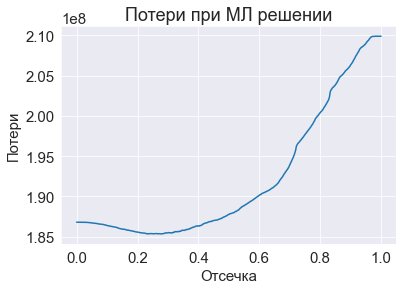

Business threshold: 0.2772772772772773
F-score threshold: 0.40867718939112535


In [718]:
bm = business_threshold_calibrate(y_test, log_test_probs, n=1000,
                                  rubl_test=1400, rubl_early_treatment=15000, rubl_late_treatment=20000)

print(f'Business threshold: {bm}')
print(f'F-score threshold: {thresholds[ix]}')

Confusion matrix, without normalization


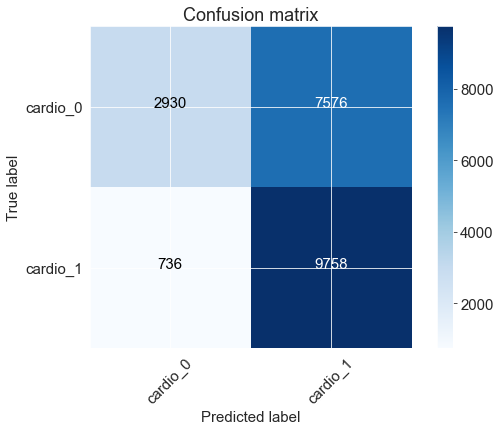

In [719]:
cnf_matrix = confusion_matrix(y_test, log_test_probs>bm) # with business calibration
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=['cardio_0', 'cardio_1'], normalize=False,
                      title='Confusion matrix',)
plt.show()

#### ML metrics

In [720]:
metrics.sort_values(by='roc_auc').style.set_properties(**{'background-color': '#F5F5DC',
                                                          'color': 'green', })

,roc_auc,recall,precision,f_score,accuracy,threshold,accuracy_05
RandomForest,0.760495,0.771965,0.646941,0.703945,0.675524,0.401014,0.708857
LogisticRegression,0.777828,0.746141,0.699607,0.722125,0.713048,0.408677,0.723524
GradientBoosting,0.800219,0.803888,0.689216,0.742148,0.720857,0.379821,0.733857


#### Сравнивать модели по бизнес метрике (например, по сумме сэкономленных денег) несколько затруднительно, так как в бустинге использовалась валидационная выборка => размер y_test различается. Попробуем для предобученной Lgbm разбить также.

In [721]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=42)

In [722]:
# NOTE: take pipe from lgbm model, not the last one!
lgbm_full_test_probs = pipe.predict_proba(X_test)[:,1]

In [723]:
business_res = []
probabilities = (forest_test_probs, log_test_probs, lgbm_full_test_probs)
for probs in probabilities:
    bm = business_threshold_calibrate(y_test, probs, n=1000,
                                      rubl_test=1400, rubl_early_treatment=15000, rubl_late_treatment=20000, plot=False)
    business_res.append(bm)
    print('='*100)

расходы, если не делать тест и ждать симптомов: 209880000
расходы, если делать тест всем и лечить группу больных: 186810000
расходы, если использовать МЛ: 185746800
Расходы "решение не делать тесты - расходы с МL:" 24133200
Расходы "решение не делать тесты - расходы сделать тесты всем": 23070000
Расходы "сделать тесты всем - решение делать тесты ML": 1063200
расходы, если не делать тест и ждать симптомов: 209880000
расходы, если делать тест всем и лечить группу больных: 186810000
расходы, если использовать МЛ: 185357600
Расходы "решение не делать тесты - расходы с МL:" 24522400
Расходы "решение не делать тесты - расходы сделать тесты всем": 23070000
Расходы "сделать тесты всем - решение делать тесты ML": 1452400
расходы, если не делать тест и ждать симптомов: 209880000
расходы, если делать тест всем и лечить группу больных: 186810000
расходы, если использовать МЛ: 184048200
Расходы "решение не делать тесты - расходы с МL:" 25831800
Расходы "решение не делать тесты - расходы сделать тес

In [724]:
metrics_last_col = np.array([roc_auc_score(y_test, probs >= i) for i, probs in zip(business_res, probabilities)])
metrics['accuracy_bm'] = metrics_last_col  # accuracy is ok as we have balanced targets

metrics.sort_values(by='roc_auc').style.set_properties(**{'background-color': '#F5F5DC',
                                                          'color': 'green', })

,roc_auc,recall,precision,f_score,accuracy,threshold,accuracy_05,accuracy_bm
RandomForest,0.760495,0.771965,0.646941,0.703945,0.675524,0.401014,0.708857,0.604376
LogisticRegression,0.777828,0.746141,0.699607,0.722125,0.713048,0.408677,0.723524,0.597423
GradientBoosting,0.800219,0.803888,0.689216,0.742148,0.720857,0.379821,0.733857,0.668992


Заданиу № 4

С задачей, как и ожидалось, лучше всего справилась модель градиентного бустинга. При достаточно большом количестве образцов в наборе ее преимущество очевидно. Данная модель, за счет "деревянности" своих базовых классификаторов изначально обладает низким уровнем сдвига (bias), то есть хорошо улавливает особенности сложных данных. При этом необходимо следить за разбросом (variance), так как бустинг может быстро переобучиться и плохо генерализироваться на новых данных. Для этого есть множество параметров: learning_rate - поправка к оптимизируемому вкладу отдельного дерева при обучении на ошибке предыдущего, n_estimators - количество деревьев в последовательности классификаторов, subsample - случайные подвыборки из входного набора данных, colsample_bytree - случайный выбор признаков для каждого дерева, reg_lambda, reg_alpha (в catboost только l2_leaf_reg) - ridge и lasso (l2 и l1) регуляризация в листьях и многие другие.

Если говорить о результатах с точки зрения коллаборации DS-метрик и бизнес метрик, то лучший результат также показала бустинговая модель, которая позволяет сэкономить больше денег. При этом, взяв порог с точки зрения наибольшей экономии, мы сильно снизили точность предсказаний (accuracy). Возможно из-за специфического баланса между FP (переплата 1400 за лишний тест) и FN (лечение в запущенном случае 20000), необходимого для минимизации затрат. FN нам, конечно, дороже. Но FN может быть относительно немного по сравнению с большим количеством ненужных тестов - нужен баланс, который мы вроде как и нашли.

Задание № 5

roc_auc_curve позволяет наблюдать способность модели к разделению данных на классы с учетом различных порогов вероятности, при этом не учитывается дисбаланс классов. precision_recall_curve позволяет оценить работу модели в условиях дисбаланса и понять при каких порогах уклон идет в сторону precision / recall, что зачастую необходимо учитывать в контексте поставленной задачи - какой род ошибки (1й или 2й) более критичен для заказчика.

Для бустинговой модели

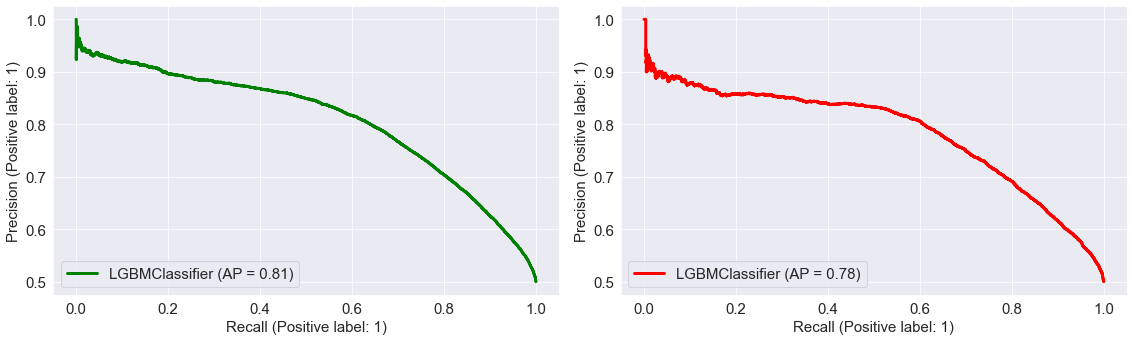

In [577]:
fig, ax = plt.subplots(1,2, figsize=(16,5))
ax = ax.flatten()
PrecisionRecallDisplay.from_estimator(pipe[-1], X_train, y_train, color='green', lw=3, ax=ax[0])
PrecisionRecallDisplay.from_estimator(pipe[-1], X_test, y_test, color='red', lw=3, ax=ax[1])
plt.tight_layout()
plt.show()

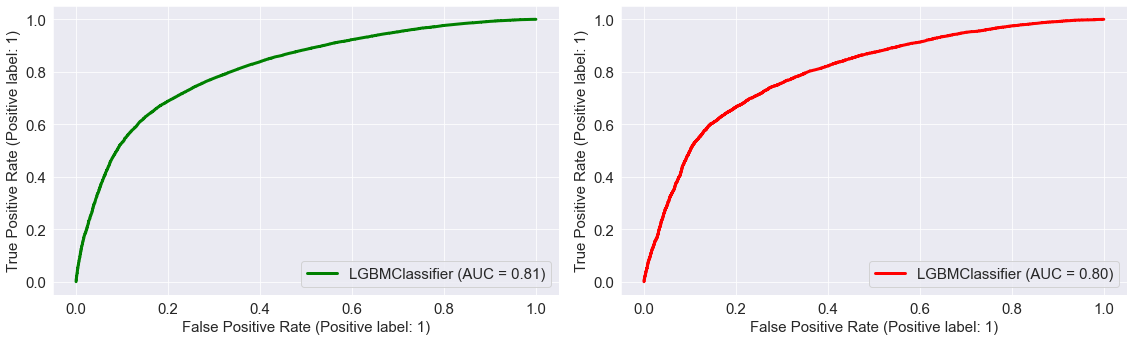

In [578]:
fig, ax = plt.subplots(1,2, figsize=(16,5))
ax = ax.flatten()
RocCurveDisplay.from_estimator(pipe[-1], X_train, y_train, color='green', lw=3, ax=ax[0])
RocCurveDisplay.from_estimator(pipe[-1], X_test, y_test, color='red', lw=3, ax=ax[1])
plt.tight_layout()
plt.show()

In [541]:
#!pip install -qq plot-metric
from plot_metric.functions import BinaryClassification

In [547]:
bc = BinaryClassification(y_test, lgbm_test_probs, labels=["Cardio_0", "Cardio_1"])

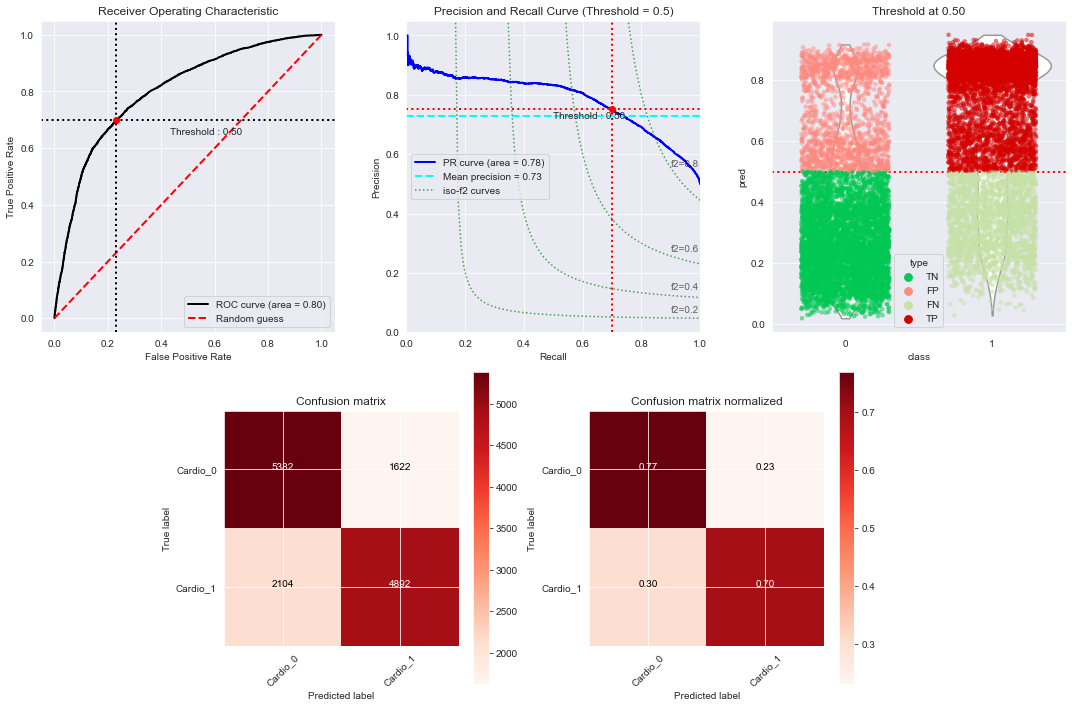

                   ________________________
                  |  Classification Report |
                   ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
              precision    recall  f1-score   support

    Cardio_0       0.72      0.77      0.74      7004
    Cardio_1       0.75      0.70      0.72      6996

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



In [560]:
param_pr_plot = {
    'c_pr_curve':'blue',
    'c_mean_prec':'cyan',
    'c_thresh_lines':'red',
    'c_f1_iso':'green',
    'beta': 2,
}

plt.figure(figsize=(15,10))
plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
bc.plot_roc_curve()
plt.subplot2grid((2,6), (0,2), colspan=2)
bc.plot_precision_recall_curve(**param_pr_plot)
plt.subplot2grid((2,6), (0,4), colspan=2)
bc.plot_class_distribution()
plt.subplot2grid((2,6), (1,1), colspan=2)
bc.plot_confusion_matrix()
plt.subplot2grid((2,6), (1,3), colspan=2)
bc.plot_confusion_matrix(normalize=True)
plt.show()
bc.print_report()